In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('digit-recognizer/train.csv')

In [59]:
data = np.array(data)                # 42000 x 785
m,n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T           # 785 x 1000
y_test = data_test[0]                # 1 x 1000
x_test = data_test[1:n] / 255.0      # 784 x 1000

data_train = data[1000:m].T          # 785 x 41000
y_train = data_train[0]              # 1 x 41000
x_train = data_train[1:n] / 255.0    # 784 x 41000

In [60]:
def init_params():
    W1 = np.random.rand(10,784) * 0.01   # Initialize weights to a smaller scale
    b1 = np.zeros((10,1))                # Initialize biases to zero
    W2 = np.random.rand(10,10) * 0.01 
    b2 = np.zeros((10,1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    Z -= np.max(Z, axis=0)  
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [81]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)  # argmax with axis=0 returns index of max value entry for every column

def get_accuracy(predictions, Y):
    return (np.sum(predictions == Y) / Y.size) * 100

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y):.2f}%")
            print("")
            
    return W1, b1, W2, b2

In [82]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.1, 501)

Iteration:  0
Accuracy: 11.19%

Iteration:  50
Accuracy: 9.82%

Iteration:  100
Accuracy: 17.00%

Iteration:  150
Accuracy: 39.05%

Iteration:  200
Accuracy: 59.57%

Iteration:  250
Accuracy: 79.29%

Iteration:  300
Accuracy: 83.61%

Iteration:  350
Accuracy: 85.71%

Iteration:  400
Accuracy: 86.97%

Iteration:  450
Accuracy: 87.89%

Iteration:  500
Accuracy: 88.46%



In [84]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

test_set_predictions = make_predictions(x_test, W1, b1, W2, b2)

print(f"Test Set Accuracy: {get_accuracy(test_set_predictions, y_test):.2f}%")


Test Set Accuracy: 88.10%


Prediction:  [9]
Label:  9


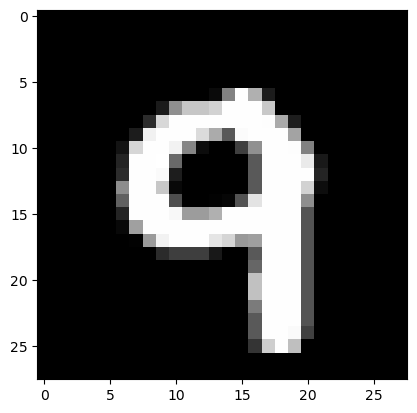

Prediction:  [8]
Label:  8


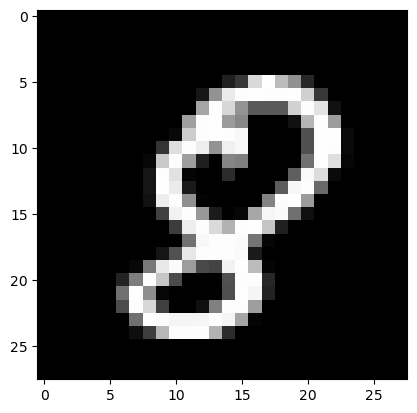

Prediction:  [2]
Label:  2


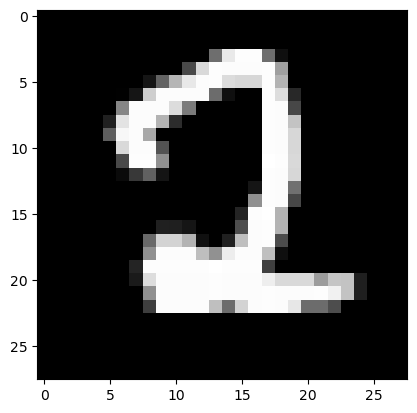

Prediction:  [3]
Label:  3


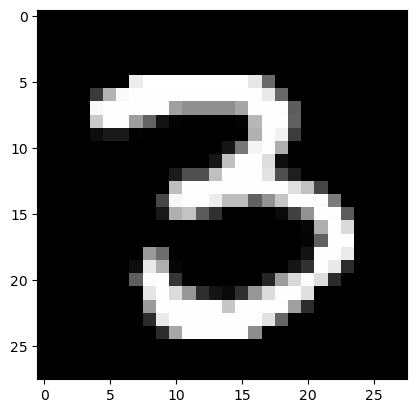

In [94]:
def visualize_test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

visualize_test_prediction(1, W1, b1, W2, b2)
visualize_test_prediction(2, W1, b1, W2, b2)
visualize_test_prediction(18, W1, b1, W2, b2)
visualize_test_prediction(123, W1, b1, W2, b2)